## Assignment: K-means Using a Real-World California Housing Dataset
**Case study** of training and tuning a k-means clustering model using a real-world California housing dataset from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download).

**Goal**: Analyze how house prices across different locations in California by clustering houses based on their **latitude** and **longitude** coordinates, along with the **median house value**.

We'll use location data (latitude and longitude) and median house value to cluster the houses, allowing us to identify patterns and trends in house prices across different areas of California.

# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Load the Dataset

In [3]:
df = pd.read_csv('housing.csv')
df.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
home_df = df[['longitude', 'latitude', 'median_house_value']]
home_df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# 2. Understand the Data:

In this project, we use latitude and longitude coordinates to determine the average house price in California Using k-means clustering

# Visualization: Dataset Scatter Plot 

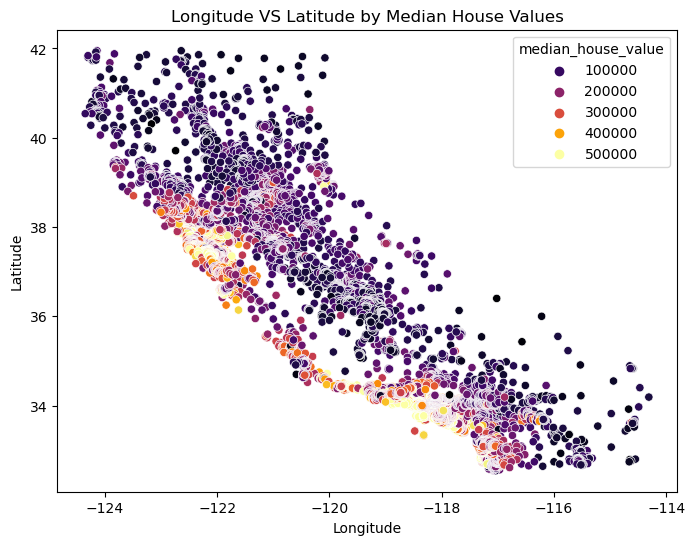

In [6]:
# Set figure size
plt.figure(figsize=(8,6))

#Plot Scatterplot
sns.scatterplot(data=home_df, x='longitude', y= 'latitude', hue= 'median_house_value', palette ='inferno')

# Add title and labels
plt.title("Longitude VS Latitude by Median House Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plt.legend()
plt.show()

In [7]:
#Check whether data has null values
home_df.isnull().sum()

longitude             0
latitude              0
median_house_value    0
dtype: int64

 As we can see, data has no null values 

In [8]:
#Check for duplicated rows 
home_df.duplicated().sum()

325

The housing data has '325' duplicated rows. And we need to remove them. 

In [9]:
#remove duplicate rows
new_df = home_df.drop_duplicates()

In [10]:
new_df.duplicated().sum()

0

<Axes: >

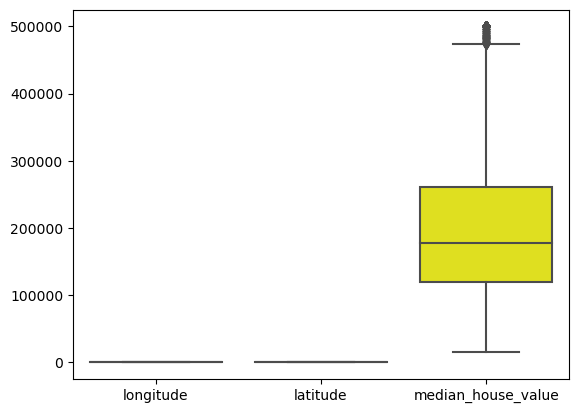

In [11]:
# Check for outliers 
sns.boxplot(new_df, color ='yellow')

Looking at the box plot, we can see that the median house value has outliers. 

In [12]:
#remove outliers 

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = new_df['median_house_value'].quantile(0.25)
Q3 = new_df['median_house_value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

clean_df = new_df[(new_df['median_house_value'] >= lower_bound) & (new_df['median_house_value'] <= upper_bound)]

<Axes: >

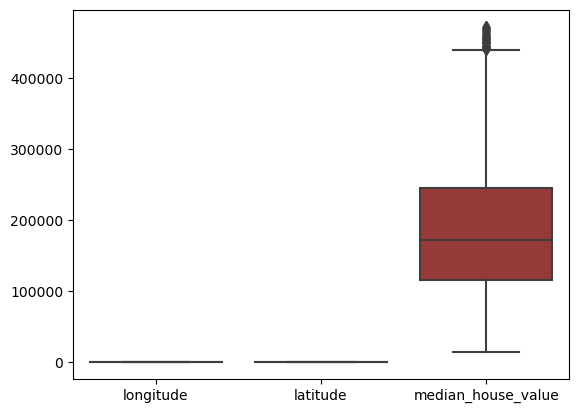

In [13]:
sns.boxplot(clean_df,color ='brown')

After removing the outliers, the boxplot still has some points above the whisker, but significantly fewer than before, indicating a more tightly bound distribution within the specified range. 

## Visualization: Scatter Plot after Data Preprocessing 

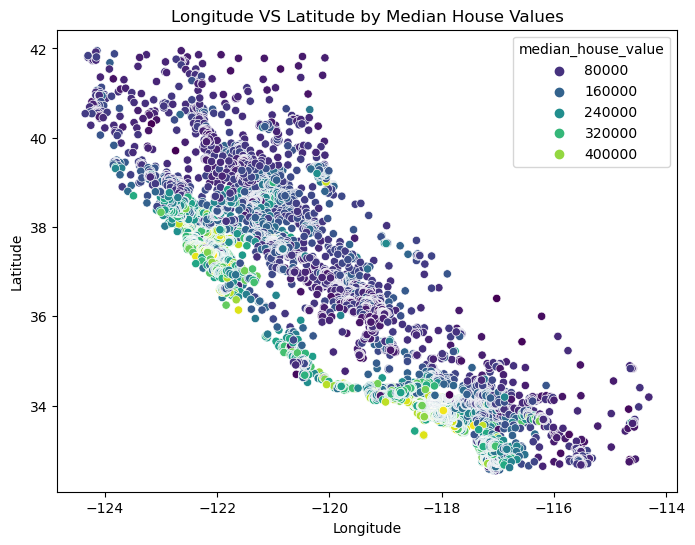

In [14]:
# Set figure size
plt.figure(figsize=(8,6))

#Plot Scatterplot
sns.scatterplot(data=clean_df, x='longitude', y= 'latitude', hue= 'median_house_value', palette ='viridis')

# Add title and labels
plt.title("Longitude VS Latitude by Median House Values")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#plt.legend()
plt.show()

# Feature Extraction

In [15]:
# Extract train and test data
X = clean_df[[ 'longitude', 'latitude']]
y = clean_df['median_house_value']

In [16]:
print(X.head())

   longitude  latitude
0    -122.23     37.88
1    -122.22     37.86
2    -122.24     37.85
3    -122.25     37.85
4    -122.25     37.85


In [17]:
print(y.head())

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


# Data Normalization
* **Normalization**: the process of scaling the features of the input data to a common range or distribution

* The process is crucial for K-means clustering to ensure that all features contribute equally to the distance calculations, improve convergence and stability, and facilitate interpretation and comparison of the clustering results.

In [18]:
# Normalize training data( longitude & Latitude)
X_normalized = normalize(X, norm = 'l2', axis = 0)
print(X_normalized)

[[-0.00732808  0.00760228]
 [-0.00732748  0.00759827]
 [-0.00732868  0.00759626]
 ...
 [-0.00726753  0.00791336]
 [-0.00727352  0.00791336]
 [-0.00726873  0.00790131]]


# Model Training

Train K-Means model with normalized data

In [55]:
# Create an instance of K-means model
k_model = KMeans(n_clusters = 3, random_state= 42, n_init = 'auto')

# Fit the model to normalized data
k_model.fit(X_normalized)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [56]:
k_model.predict(X_normalized)

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
# Get the clusters for each data point
labels = k_model.labels_
labels

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
# Get the centroids
centroids = k_model.cluster_centers_
centroids

array([[-0.00720279,  0.00730666],
       [-0.00730898,  0.00767288],
       [-0.00706998,  0.00679104]])

## Visualization: Scatter Plot after Model Training 

In [59]:
# Convert x_new to a DataFrame
homes_df = pd.DataFrame(X_normalized, columns=['longitude','latitude']) 

# Add the cluster labels to the DataFrame
homes_df['cluster'] = k_model.labels_ 

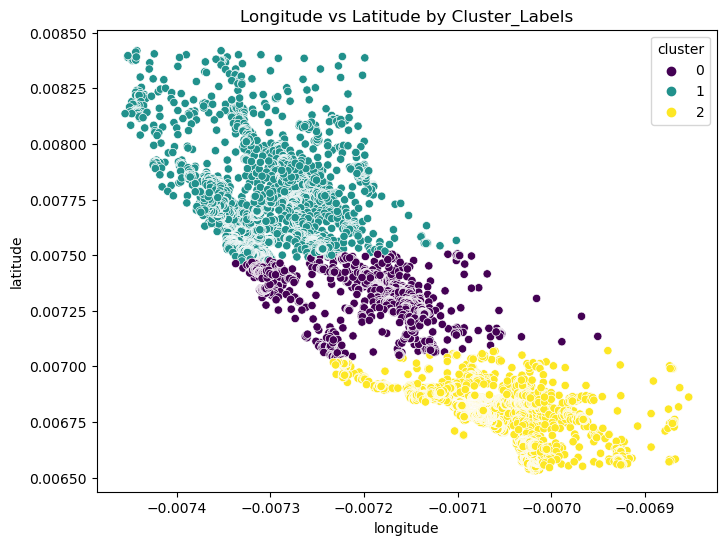

In [60]:
# Create the scatter plot 
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(data=homes_df, x = 'longitude', y = 'latitude', hue= 'cluster', palette='viridis')

plt.title('Longitude vs Latitude by Cluster_Labels')
# Show the plot
plt.show()

## Visualization: Plot Clusters with Centroids 

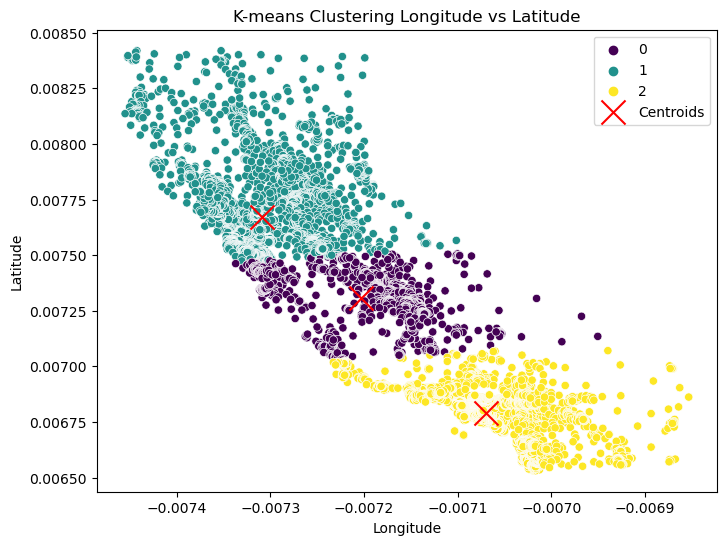

In [61]:
# Plot the clusters and centroids
plt.figure(figsize=(8,6))

scatter_plot = sns.scatterplot(data=homes_df,  x = 'longitude',  y = 'latitude', hue= 'cluster', palette='viridis')
plt.scatter(centroids[:,0],centroids[:,1], s=300, marker='x', c='red', label='Centroids')


plt.title('K-means Clustering Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.show()

 ### Cluster interpretation 
 
* Each data point represents a house or a group of houses, and the color coding indicates the clusters identified by the K-means clustering algorithm.
 
* The scatter plot reveals that the average house prices have a geographic component, with distinct average price ranges clustered in different areas. 

* The K-means clustering algorithm has identified these price patterns based on the longitude and latitude coordinates. 

* However, it's important to consider that other factors beyond location may also influence house prices, and further analysis incorporating additional features would provide a more comprehensive understanding of the housing market dynamics.

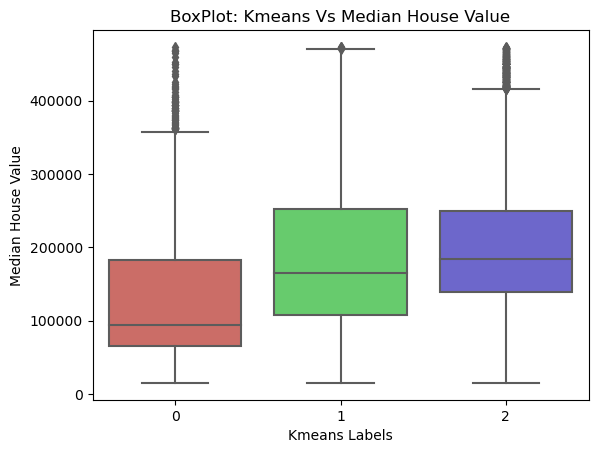

In [64]:
sns.boxplot(data= homes_df, x = k_model.labels_, y = clean_df['median_house_value'], palette='hls')
plt.xlabel('Kmeans Labels')
plt.ylabel('Median House Value')
plt.title('BoxPlot: Kmeans Vs Median House Value')
plt.show()

### Box plot interpretation 
The horizontal lines inside each box represent the median house values for each cluster. 

* Cluster 0 has the lowest median house value, followed by Cluster 1, and Cluster 2 has the highest median value.
* The individual points above or below the whiskers are outliers, which signify data points that differ significantly from the majority of the data within each cluster

* Clusters were geographically separated based on longitude and latitude, indicating that location influences house prices. The box plot confirms this by demonstrating that each cluster has a different range and median of house values.

* The box plot reinforces the findings from the scatter plot, showing that the K-means clustering algorithm has identified distinct groups of houses with different price ranges based on their geographic location. 

## Determining the Optimal Value of K 

1. The Elbow Method

The most commonly used metric for the elbow method is the Within-Cluster Sum of Squares (WCSS) or inertia.
To use the elbow method with Within-Cluster Sum of Squares (WCSS):

Run K-means clustering on the dataset for a range of k values (e.g., 1 to 10).
Calculate the WCSS for each k.
Plot the WCSS values against the number of clusters k.
The optimal k is identified as the point where the WCSS starts to decrease more slowly, forming an "elbow" shape in the plot.

In [53]:
# Define the range of K values (no of clusters)
k_values = range(1,11)
k_values_list = [1,2,3,4,5,6,7,8,9,10]

# Initialize inertia list
wcss = []

for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto')
  # Fit the KMeans model
  kmeans.fit(X_normalized)
  # Append the inertia values to the list
  wcss.append(kmeans.inertia_)

wcss

[0.003909659327168746,
 0.0005294462569826183,
 0.00033184192042539094,
 0.00023945680638110206,
 0.00016565629962806837,
 0.00012258933799074234,
 8.294528292862957e-05,
 7.388531842775621e-05,
 6.322854799979886e-05,
 5.3906239889786816e-05]

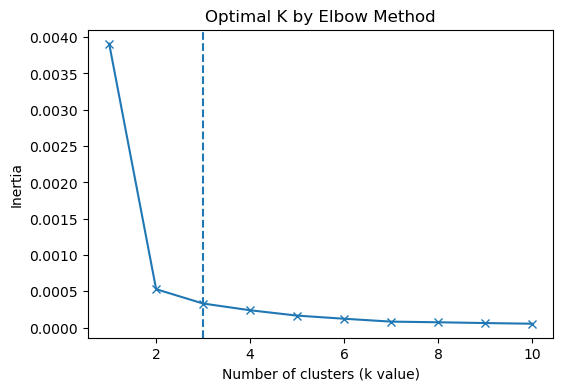

In [54]:
plt.figure(figsize=(6,4))

plt.plot(k_values, wcss, marker = 'x', linestyle='-')
plt.axvline(x=3, ls='--')
# Add axis and title
plt.xlabel('Number of clusters (k value)')
plt.ylabel('Inertia')
plt.title('Optimal K by Elbow Method')

plt.show()

### As we can see above the elbow point is at cluster 3 (k = 3). 

2. #### Silhouette Score

It measures how well each data point fits into its assigned cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a higher value indicates better clustering.

Interpreting the silhouette score:

* A silhouette score close to 1 indicates that the clusters are well-separated and the data points within each cluster are tightly grouped.

* A silhouette score close to 0 indicates that the clusters are overlapping and the data points are close to the decision boundary between clusters.

* A silhouette score close to -1 indicates that the data points may have been assigned to the wrong clusters.

In [33]:
k_values = range(2,11)

silhouette_scores = []

In [34]:
for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
  # Fit the KMeans model
  kmeans.fit(X_normalized)
  # Compute the silhoutte score for each cluster
  score = silhouette_score(X_normalized, kmeans.labels_)
  # Append the silhouette_scores to the list
  silhouette_scores.append(score)
    
silhouette_scores

[0.7846657820712722,
 0.6773179665953488,
 0.6047930174145643,
 0.5863923416433022,
 0.6300818402695557,
 0.6309794030168089,
 0.5991130252134343,
 0.4465468964598493,
 0.42067930845090196]

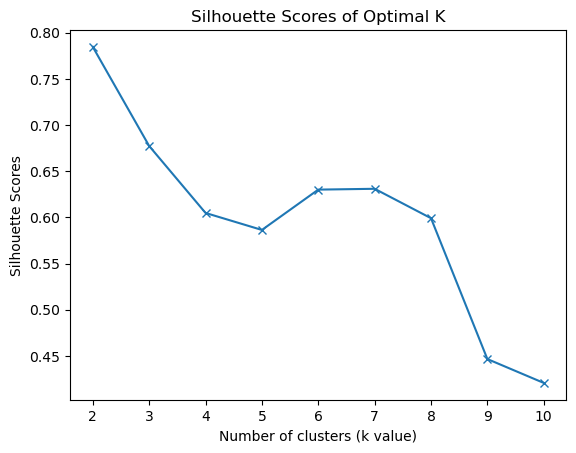

In [38]:
plt.plot(k_values, silhouette_scores, marker = 'x', linestyle='-')

# Add axis labels and title 
plt.xlabel('Number of clusters (k value)')
plt.ylabel('Silhouette Scores')
plt.xticks(k_values)
plt.title('Silhouette Scores of Optimal K')

plt.show()